# Fonction softmax 

## Définition

La fonction $S: \mathbb{R}^n \mapsto \mathbb{R}^n$ definie par:
$$
S((x_i)_{1 \le i \le n}) = \frac{(e^{x_i})_{1 \le i \le n}}{\sum_{k=1}^n{e^{x_k}}}
$$

est appelée *fonction softmax* de $\mathbb{R}^n$. Pour chaque $x$ elle définie une probabilité sur la partie $\{1,\cdots,n\}$. Pour cette raison dans la suite on notera $\hat{p}_i$ la valeur $S(x)_i = \pi_i(S(x))$, en omettant d'écrire $x$ dont la présence sera implicite.

## Jacobien de $S$

La matrice jacobienne $J$ de $S$ est définie par:
$$
\partial_{j}(\pi_i \circ S)(x) = J(x)_{i,j} = \hat{p}_i(\delta_{i=j} - \hat{p}_j)
$$

## Entropies croisées $H$ et $\mathcal{H}$
Soit $q_i$ une probabilité sur la partie $\{1,\cdots,n\}$. L'entropie croisée de $q$ et $S(x)$ est la fonction $\mathcal{H}_q: \mathbb{R}^n \mapsto \mathbb{R}^+$ définie par:
$$
\mathcal{H}_q(x) = -\sum_{i=1}^n{q_ilog(\hat{p}_i)}
$$
Elle est minimale pour $\hat{p}=q$ (voir la démonstration plus bas). Notons qu'il s'agit d'une fonction de $x$ paramétrée par $q$. 

Définissons l'entropie croisée des probabilités $q$ et $p$ comme suit:
$$
H_q: Simplex(n) \mapsto \mathbb{R}^+
$$
$$
H_q(p) = -\sum_{i=1}^n{q_i log(p_i)}
$$ 
où $Simplex(n) = \{(p_i)_{i\in{1\cdots n}}; \sum_{i=1}^n{p_i}=1\}$. Il est clair que $\mathcal{H}_q(x)=H_q(\hat{p})$. 

La contrainte sur le simplexe fait que $H_q$ est définie sur un espace à $n-1$ dimensions. Par exemple la donnée de $p_1,\cdots p_{n-1}$ détermine $p_n$. Notons $H_q^{[-n]}$ la fonction définie ainsi:
$$
H_q^{[-n]}(p_1,\cdots p_{n-1}) = H_q (p_1,\cdots,p_{n-1},1-p_1-\cdots-p_{n-1})
$$
et son gradient:
$$
\nabla H_q^{[-n]} = (\frac{q_n}{p_n}-\frac{q_i}{p_i})_{i\in\{1\cdots n\}}
$$
Remarquons que le gradient est sensible à la composante qui subit la contrainte (ici la n-ième): seules les autres composantes sont susceptibles d'êtres fixes lors du calcul d'une dérivée partielle: la définition du domaine d'une fonction fait bien partie de la définition de la fonction, et $H_q^{[-N]}$ est clairement distincte, par exemple, de $H_q^{[n-1]}$ et en particulier $\partial_1 H_q^{[-N]} \neq \partial_1 H_q^{[n-1]}$.

Si on annule le gradient $\nabla H_q^{[-n]}$ on trouve: $\forall i\in\{1\cdots n\} \frac{q_i}{p_i}=\frac{q_n}{p_n}$, et compte tenu que $\sum {p_i} = \sum{q_i} = 1$ on voit que $H_q(p)$ est minimale lorsque $p_i = q_i, \forall i$.

Relachons la contrainte sur les composantes de $p$ et définissons $\bar{H}_q(p)$:
$$
\bar{H}_q(p): \mathbb{R}^{*+} \mapsto \mathbb{R}
$$
$$
\bar{H}_q(p) = -\sum_{i=1}^n{q_i log(p_i)}
$$
Donc ${H}_q = \bar{H}_q\mid_{Simplex(n)}$. Son gradient vaut:
$$
\nabla\bar{H}_q(p) = (-\frac{q_i}{p_i})_{i\in\{1\cdots n\}}
$$

### Gradient de $\mathcal{H}_q$

Rappelons que par définition $\mathcal{H}_q = \bar{H}_q(S(x)) = \bar{H}_q(\hat{p})$. C'est une fonction de $x$ qui se décompose ainsi:
$$
\mathbb{R}^n\stackrel{S}{\longmapsto}\mathbb{R}^n\stackrel{\bar{H}_q}{\longmapsto}\mathbb{R}
$$
Donc: $\mathcal{H}_q'(x) = \bar{H}_q'(S(x))\circ S'(x)$. En vertue du calcul des dérivées éffectués précédemment, on obtient 
$$
\mathcal{H}_q'(x) = (\sum_{k=1}^n{q_k(\hat{p}_i-\delta_{i=k})})_{i\in\{1\cdots n\}}
$$
>Cas particulier: si $q$ est concentrée sur une seule valeur c, ($q_i=\delta_{i=c}$), alors $\mathcal{H}_q'(x) = \hat{p} - q = \delta$ (signal d'erreur).

# Mise en réseau

On utilise la fonction softmax suite à une fonction $f$, et un évalue une entropie croisée avec la distribution $q$. On considère donc la séquence suivante:
$$
\mathbb{R}^n\stackrel{f}{\longmapsto}\mathbb{R}^{n_h}\stackrel{S}{\longmapsto}\mathbb{R}^{n_h}\stackrel{\bar{H}_q}{\longmapsto}\mathbb{R}
$$
($n_h$ : taille de la "couche cachée"). Notons $\mathcal{H}_q(x,f) = (\mathcal{H}_q\circ S\circ f)(x)$ cette séquence. 

## $\partial_x{\mathcal{H}_q(x,f)}$
On a :
$$
\partial_x{\mathcal{H}_q(x,f)} = (\mathcal{H}_q\circ S)'(f(x))\circ f'(x)
$$
et $(\mathcal{H}_q\circ S)'$ est désormais bien connue d'après les calculs précédents. Le développement de cette expression se simplifie considérablement dans le cas particulier suivant.

### cas particulier: $q$ concentrée sur une valeur et $f$ affine (regression logistique)

choisissons:
$$
q_i = \delta_{i=c}
$$
$$
f(x) = wx+b
$$
Alors d'après ce qui précède:
>$$
\partial_x{\mathcal{H}_q(x,f)} = (\hat{p}-q)^T w = \delta^T w
$$

## $\partial_f{\mathcal{H}_q(x,f)}$
Pour mener à bien ce calcul il faut introduire une fonction intermédière $\psi$:
$$
\psi: ((\mathbb{R}^{n_h})^{\mathbb{R}^n}\times \mathbb{R}^n)\mapsto \mathbb{R}^{n_h}
$$
$$
\psi (f,x) = f(x)
$$
Les dérivées de $\psi$ sont:

$$
\partial_x{\psi(f,x)} = f'(x)
$$
$$
\partial_f{\psi(f,x)} = \psi (\cdot,x)
$$

où $\psi (\cdot,x)$ est l'application linéaire de $\mathbb{R}^n$ dans $\mathbb{R}^{n_h}$ qui envoie $h$ vers $h(x)$. On a:

$$
\mathcal{H}_q(x,f) = (\mathcal{H}_q\circ S\circ \psi)(f, x)
$$
et
$$
\partial_f{\mathcal{H}_q(x,f)} = (\mathcal{H}_q\circ S)'(f(x))\circ \partial_f{\psi(f,x)} = (\mathcal{H}_q\circ S)'(f(x))\circ \psi(\cdot, x)
$$

Ici encore les calculs se simplifient dans le cas particulier déjà abordé:

### cas particulier de la regression logistique

Pour une application linéaire donnée par la matrice $w=w_{i,j}$, la valeur $\frac{\partial\psi}{\partial w_{i,k}}(w,x)$ est simplement $1_{i,j}x$, où $1_{i,j}$ est la matrice nulle partout sauf à la ligne $i$ et colonne $j$ où elle vaut 1. En effet:
$$
\psi(w + \epsilon 1_{i,j},x) = wx + \epsilon 1_{i,j}x = \psi(w,x) + \epsilon 1_{i,j}x
$$
Le vecteur $1_{i,j}x$ (dans $\mathbb{R}^{n_h}$) est nul partout sauf à la ligne $i$ où il vaut $x_j$. D'où

>$$
\partial_{w_{i,j}}\mathcal{H}_q(x,w) = \delta^T (1_{i,j}x) = \delta_i x_j
$$

Un autre argument s'appuierait sur l'égalité

$$
\partial_{w_{i,j}}\psi = \partial_f\psi\circ\partial_{w_{i,j}}f
$$

en se restreignant à $f\in\mathcal{L}(R^n,R^{n_h})$. Si $w$ est la matrice de $f$, $\partial_{w_{i,j}}f = 1_{i,j}$, et $\partial_f\psi (1_{i,j},x) = 1_{i,j}x$.

On peut être plus synthétique en écrivant $\partial_w\mathcal{H}_q(x,w)=\delta\cdot x^T$, qui construit une matrice $n_h\times n$ en prenant garde alors qu'en pratique $\partial_w\mathcal{H}_q(x,w)(u)$ est obtenu comme le **produit scalaire** des matrices $\delta\cdot x^T$ et $u$.

En procédant de même pour $b$ on trouve 
>$$
\partial_b\mathcal{H}_q(x,w) = \delta^T
$$

## Application: fonctions d'activations logistiques (sigmoïdes) sur la dernière couche

On enrichit le cas particulier précédent en ajoutant une fonction d'activation logistique $\sigma(x) = \frac{1}{1+e^{-x}}$. On note $[\sigma]$ la fonction $\sigma$ *vectorisée*: 
$$
[\sigma]: \mathbb{R}^{n_h}\mapsto\mathbb{R}^{n_h}
$$
Sa jacobienne est $J_{[\sigma]}(x)=\Delta(\sigma(x_i)(1-\sigma(x_i)))_{i\in\{1\cdots n_h\}}$

La nouvelle entropie s'exprime de la manière suivante:
$$
\mathcal{H}_q(x,f)=(\bar{H}_q \circ S \circ [\sigma] \circ f)(x) = (\bar{H}_q \circ S \circ [\sigma] \circ\psi)(f,x)
$$
On remarque que
$$
(\bar{H}_q \circ S \circ [\sigma])'(f(x)) = (\delta_i\sigma_i(1-\sigma_i))^T_{i\in\{1,\cdots,n_h\}}
$$
avec $\sigma_i = \sigma(\pi_i\circ f(x))$. Un calcul exactement silimaire au cas particulier précédent montre donc:

$$
\begin{eqnarray}
\partial_x{\mathcal{H}_q(x,f)}&=&((\delta_i\sigma_i(1-\sigma_i))^T_{i\in\{1,\cdots,n_h\}}w \\
\partial_{w_{i,j}}{\mathcal{H}_q(x,f)}&=&\delta_i\sigma_i(1-\sigma_i)x_j \\
\partial_{b}{\mathcal{H}_q(x,f)}&=&((\delta_i\sigma_i(1-\sigma_i))^T_{i\in\{1,\cdots,n_h\}}
\end{eqnarray}
$$

## Application: une couche cachée avec fonctions d'activations logistiques

On considère maintenant la machine suivante:

$$
\mathcal{H}_q(x,f,g) = (\bar{H}_q\circ S\circ g\circ [\sigma]\circ f)(x)
$$

$$
\partial_x{\mathcal{H}_q(x,f,g)} = (\bar{H}_q\circ S)'((g\circ[\sigma]\circ f) (x))\circ g' (([\sigma]\circ f) (x))\circ [\sigma]'(f(x))\circ f'(x)
$$
qui se simplifie dans le cas où $f$ et $g$ sont linéaires et avec une probabilité $q$ définie comme précédemment en:

$$
\partial_x{\mathcal{H}_q(x,f,g)} = (\ (\underbrace{(\underbrace{\hat{p}-q}_{\delta})^T g}_{\delta})\ \odot\ [\sigma(1-\sigma)](f(x))\ )\ f
$$

En écrivant
$$
\mathcal{H}_q(x,f,g) = \bar{H}_q\circ S\circ \psi(g,[\sigma]\circ f(x))
$$

on trouve 
$$
\partial_g{\mathcal{H}_q(x,f,g)} = (\bar{H}_q\circ S)'((g\circ[\sigma]\circ f) (x))\circ \psi(.,[\sigma]\circ f(x))
$$
soit, en écriture matricielle:
$$
\partial_{w^{(g)}}{\mathcal{H}_q(x,f,g)} = (\hat{p}-q)\ ([\sigma]\circ f(x))^T
$$

En écrivant
$$
\mathcal{H}_q(x,f,g) = \bar{H}_q\circ S\circ g\circ [\sigma]\circ\psi (f,x)
$$

on trouve
$$
\partial_f{\mathcal{H}_q(x,f,g)} = (\bar{H}_q\circ S)'((g\circ[\sigma]\circ f) (x))\circ g\circ [\sigma]'(f(x))\circ\psi(.x)
$$
soit, en écriture matricielle:
$$
\partial_{w^{(f)}}{\mathcal{H}_q(x,f,g)} = (\ ((\hat{p}-q)^T w^{(g)})\odot[\sigma(1-\sigma)](w^{(f)}x))\ )\ x^T
$$

### Remarque "architecturale"

Dans une architecture en couche unidirectionelle comme précédemment, si la matrice $w$ connecte la couche $L_i$ à la couche $L_{i+1}$, $\partial_w\mathcal{H}_q = \delta^{(i+1)}\ x^{(i)T}$ où $\delta^{(i+1)}$ est le signal d'erreur mesuré en $L_{i+1}$, et $x^{(i)}$ la sortie de la couche $L_i$. De plus $\partial_x\mathcal{H}_q = \delta^{(1)T}\ w^{(1)}$. Les signaux d'erreurs $\delta^{(i)}$ se construisent itérativement à partir de la sortie du réseau (en commençant par $(\hat{p}-q)$ dans les cas étudiés plus haut). 

# Modèles de langage

Il s'agit de savoir estimer une probabilité pour une séquence de mots $(w_1,\cdots,w_T)$. On peut écrire:  

$$
P(w_1,\cdots,w_T) = \Pi_{i=1}^T P(w_i|w_{i-1},\cdots,w_1) 
$$
soit approximativement:
$$
P(w_1,\cdots,w_T)\approx\Pi_{i=1}^T P(w_i|w_{i-1},\cdots,w_{i-1-n})
$$

L'estimation des probabilités conditionnelles par dénombrement est gourmand en mémoire, et demande de mettre en place des procédures de backoffs, pour passer de n-grammes à (n-1)-grammes lorsque les populations sont trop faible.

## Réseaux récurrents

Une cellule est décrite ainsi:  

entrées: $(x_1,\cdots,x_T)$ où chaque $x_i$ est le vecteur (dans un embedding donné, GloVe par exemple) du i-ème mot.
  
$$
h_i = \sigma(W^{(hh)}h_{i-1} + W^{(hx)}x_i)
$$
  
$$
y_i = S(W^{(S)}(h_i)
$$
  
$$
\hat{P}(x_{i+1}=v_k|x_i,\cdots,x_1) = y_{i,k}
$$

$y_{i}$ est un vecteur de la taille du vocabulaire de la langue ciblée. 


# Use TF for recognizing hand written digits
(see https://www.youtube.com/watch?v=BtAVBeLuigI and https://github.com/martin-gorner/tensorflow-mnist-tutorial)

In [ ]:
import os
import sys
sys.path.append ('/home/thierry/tmp/tensorflow-mnist-tutorial')
import tensorflow as tf
import tensorflowvisu
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
import random

In [ ]:
mnist = mnist_data.read_data_sets ("data", one_hot=True, reshape=False, validation_size=0)

# Some helpers to monitor the performance

In [4]:
import bqplot as bq
from IPython.display import display
import ipywidgets.widgets as widgets
from ipywidgets import Layout, Button

class LinesMonitor:
    def __init__(self, y_scale_init = (0.0, 1.0)):
        self.xs = []
        self.ys = []
        self.x_scale = bq.LinearScale (min=0.0, max=5.0)
        self.y_scale = bq.LinearScale (min=y_scale_init [0], max=y_scale_init [1])
        x_axis = bq.Axis (scale=self.x_scale)
        y_axis = bq.Axis (scale=self.y_scale, orientation='vertical')
        self.line = bq.Lines (x=self.xs, y=self.ys, scales={'x': self.x_scale, 'y': self.y_scale})
        self.fig = bq.Figure (marks=[self.line], axes=[x_axis, y_axis])
        
    def addPoint (self, i, value):
        if i > self.x_scale.max:
            self.x_scale.max = i + 5
        if value > self.y_scale.max:
            self.y_scale.max = value
            self.y_scale.max = self.y_scale.max + (self.y_scale.max - self.y_scale.min)/10.0
        if value < self.y_scale.min:
            self.y_scale.min = value
            self.y_scale.min = self.y_scale.min - (self.y_scale.max - self.y_scale.min)/10.0
        self.xs.append (i)
        self.ys.append (value)
        self.line.x = self.xs
        self.line.y = self.ys
        

In [ ]:
m = LinesMonitor ()
display (m.fig)

In [ ]:
m.addPoint (6,-1)

## First try, with simple logistic regression

In [ ]:
tf.set_random_seed(0)

X = tf.placeholder (tf.float32, [None, 28, 28, 1])
XX = tf.reshape (X, [-1, 28*28])
Y_ = tf.placeholder (tf.float32, [None, 10])

W = tf.Variable (tf.zeros ([28*28, 10]))
b = tf.Variable (tf.zeros([10]))

Y = tf.nn.softmax (tf.matmul (XX, W) + b)

H = -tf.reduce_sum (Y_ * tf.log (Y))
acc = tf.reduce_mean (tf.cast (tf.equal (tf.argmax (Y,1), tf.argmax (Y_,1)), tf.float32))

train_step = tf.train.GradientDescentOptimizer (0.005).minimize (H)

init = tf.global_variables_initializer ()
sess = tf.Session ()
sess.run(init)

allweights = tf.reshape (W, [-1])
allbiases = tf.reshape (b, [-1])
I = tensorflowvisu.tf_format_mnist_images(X,Y,Y_)
It = tensorflowvisu.tf_format_mnist_images(X,Y,Y_,1000, lines=25)


def training_step (i, update_test_data, update_train_data):
    batch_X, batch_Y = mnist.train.next_batch (100)
    
    if update_train_data:
            a,c,im,w,b = sess.run ([acc, H, I, allweights, allbiases], feed_dict = {X: batch_X, Y_: batch_Y})
            datavis.append_training_curves_data(i, a, c)
            datavis.append_data_histogram(i, w, b)
            datavis.update_image1 (im)
    if update_test_data:
        a,c,im = sess.run([acc, H, It], feed_dict={X: mnist.test.images, Y_:mnist.test.labels})
        datavis.append.test_curves_data (i,a, c)
        datavis.update_image2 (im)
        
    sess.run (train_step, feed_dict={X:batch_X, Y_:batch_Y})
    

m = LinesMonitor ()
display (m.fig)
batch_X, batch_Y = mnist.train.next_batch (100)
sess.run (train_step, feed_dict={X:batch_X, Y_:batch_Y})
a,c,im,w,b = sess.run ([acc, H, I, allweights, allbiases], feed_dict = {X: batch_X, Y_: batch_Y})
m.addPoint (1,a)

for i in range (2, 1001):
    batch_X, batch_Y = mnist.train.next_batch (100)
    sess.run (train_step, feed_dict={X:batch_X, Y_:batch_Y})
    if i % 10 == 0:
        #a,c,im = sess.run([acc, H, It], feed_dict={X: mnist.test.images, Y_:mnist.test.labels})
        a,c,im,w,b = sess.run ([acc, H, I, allweights, allbiases], feed_dict = {X: batch_X, Y_: batch_Y})
        m.addPoint (i, a)

In [ ]:
mnist.test.images.shape

# Hand written digits with t-sne

In [6]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

mnist_data = mnist.train.images.reshape (60000, 28*28) [0:16000,:]

mnist_embedded = TSNE(n_components=2).fit_transform(mnist_data)

NameError: name 'mnist' is not defined

In [ ]:
plt.scatter (mnist_embedded[:,0], mnist_embedded[:,1])

# Stanford assignment 1

In [ ]:
def softmax(x):
    if (type (x) == list): 
        x = np.array (x).reshape (len(x),)
    row_maxs = np.max (x, axis=-1, keepdims=1)
    exps = np.exp (x - row_maxs)
    Z = np.sum (exps, axis=-1, keepdims=1)
    return (exps / Z)

def test_softmax_basic():
    """
    Some simple tests to get you started.
    Warning: these are not exhaustive.
    """
    print ("Running basic tests...")
    test1 = softmax(np.array([1, 2]))
    print (test1)
    ans1 = np.array([0.26894142, 0.73105858])
    assert np.allclose(test1, ans1, rtol=1e-05, atol=1e-06)

    test2 = softmax(np.array([[1001, 1002], [3, 4]]))
    print (test2)
    ans2 = np.array([
        [0.26894142, 0.73105858],
        [0.26894142, 0.73105858]])
    assert np.allclose(test2, ans2, rtol=1e-05, atol=1e-06)

    test3 = softmax(np.array([[-1001, -1002]]))
    print (test3)
    ans3 = np.array([0.73105858, 0.26894142])
    assert np.allclose(test3, ans3, rtol=1e-05, atol=1e-06)

    print ("You should be able to verify these results by hand!\n")


def sigmoid (x):
    if (type (x) == list): x = np.array (x).reshape (1, len(x))
    return 1/(1 + np.exp(-x))

def sigmoid_grad(s):
    return s*(1-s)

def test_sigmoid_basic():
    """
    Some simple tests to get you started.
    Warning: these are not exhaustive.
    """
    print ("Running basic tests...")
    x = np.array([[1, 2], [-1, -2]])
    f = sigmoid(x)
    g = sigmoid_grad(f)
    print (f)
    f_ans = np.array([
        [0.73105858, 0.88079708],
        [0.26894142, 0.11920292]])
    assert np.allclose(f, f_ans, rtol=1e-05, atol=1e-06)
    print (g)
    g_ans = np.array([
        [0.19661193, 0.10499359],
        [0.19661193, 0.10499359]])
    assert np.allclose(g, g_ans, rtol=1e-05, atol=1e-06)
    print ("You should verify these results by hand!\n")


def gradcheck_naive(f, x):
    """ Gradient check for a function f.

    Arguments:
    f -- a function that takes a single argument and outputs the
         cost and its gradients
    x -- the point (numpy array) to check the gradient at
    """

    rndstate = random.get_state()
    random.set_state(rndstate)
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4        # Do not change this!

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        # Try modifying x[ix] with h defined above to compute
        # numerical gradients. Make sure you call random.setstate(rndstate)
        # before calling f(x) each time. This will make it possible
        # to test cost functions with built in randomness later.

        ### YOUR CODE HERE:
        x [ix] = x [ix] + h
        random.set_state(rndstate)
        f2, d2 = f(x)
        x [ix] = x [ix] -2*h
        random.set_state(rndstate)
        f3, d3 = f(x)
        x [ix] = x [ix] + h
        numgrad = (f2 - f3)/(2*h)
        ### END YOUR CODE

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        #print ("Your gradient: %f \t Numerical gradient: %f" % (
        #    grad[ix], numgrad))
        if reldiff > 1e-5:
            print ("Gradient check failed.")
            print ("First gradient error found at index %s" % str(ix))
            #print ("Your gradient: %f \t Numerical gradient: %f" % (
            #    grad[ix], numgrad))
            #return

        it.iternext() # Step to next dimension

    print ("Gradient check passed!")


def test_gradcheck():
    """
    Some basic sanity checks.
    """
    quad = lambda x: (np.sum(x ** 2), x * 2)

    print ("Running sanity checks...")
    gradcheck_naive(quad, np.array(123.456))      # scalar test
    gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
    gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test
    print ("")


In [ ]:
def forward_backward_prop(data, labels, params, dimensions):
    """
    Forward and backward propagation for a two-layer sigmoidal network

    Compute the forward propagation and for the cross entropy cost,
    and backward propagation for the gradients for all parameters.

    Arguments:
    data -- M x Dx matrix, where each row is a training example.
    labels -- M x Dy matrix, where each row is a one-hot vector.
    params -- Model parameters, these are unpacked for you.
    dimensions -- A tuple of input dimension, number of hidden units
                  and output dimension
    """

    ### Unpack network parameters (do not modify)
    ofs = 0
    Dx, H, Dy = (dimensions[0], dimensions[1], dimensions[2])

    W1 = np.reshape(params[ofs:ofs+ Dx * H], (Dx, H))
    ofs += Dx * H
    b1 = np.reshape(params[ofs:ofs + H], (1, H))
    ofs += H
    W2 = np.reshape(params[ofs:ofs + H * Dy], (H, Dy))
    ofs += H * Dy
    b2 = np.reshape(params[ofs:ofs + Dy], (1, Dy))

    ### YOUR CODE HERE: forward propagation
    x1 = sigmoid (data@W1 + b1)
    phat = softmax (x1@W2 + b2)
    cost = -np.sum (labels*np.log (phat))/data.shape[0]
    ### END YOUR CODE

    ### YOUR CODE HERE: backward propagation
    
    delta2 = (phat - labels)/data.shape[0]
    #gradW2 = np.sum (np.expand_dims(x1,2) * np.expand_dims(delta2,1), axis=0)
    gradW2 = (x1.T@delta2)
    gradb2 = np.sum (delta2, axis=0)
    delta1 = (delta2@np.transpose(W2))*sigmoid_grad(x1)
    #gradW1 = np.sum (np.expand_dims(data,2) * np.expand_dims(delta1,1), axis=0)
    gradW1 = data.T@delta1
    gradb1 = np.sum (delta1, axis=0)
    ### END YOUR CODE

    ### Stack gradients (do not modify)
    grad = np.concatenate((gradW1.flatten(), gradb1.flatten(),
        gradW2.flatten(), gradb2.flatten()))
    return cost, grad


def sanity_check():
    """
    Set up fake data and parameters for the neural network, and test using
    gradcheck.
    """
    print ("Running sanity check...")

    N = 20000
    dimensions = [1000, 100, 10]
    #dimensions = [2, 2, 2]

    data = np.random.randn(N, dimensions[0])   # each row will be a datum
    labels = np.zeros((N, dimensions[2]))
    for i in range(N):
        labels[i, random.randint(0,dimensions[2]-1)] = 1

    params = np.random.randn((dimensions[0] + 1) * dimensions[1] + (
        dimensions[1] + 1) * dimensions[2], )
    forward_backward_prop(data, labels, params, dimensions)
    #gradcheck_naive(lambda params:
    #    forward_backward_prop(data, labels, params, dimensions), params)


In [ ]:
# Hand written digits with t-sne

In [ ]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
digits = load_digits()
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
mnist_data = mnist.train.images.reshape (60000, 28*28) [0:16000,:]

In [ ]:
mnist_embedded = TSNE(n_components=2).fit_transform(mnist_data)

In [ ]:
plt.scatter (mnist_embedded[:,0], mnist_embedded[:,1])

# Wiki 

## hand written digits from sklearn datasets. One hidden layer with sigmoid activation followed by softmax. 

<IPython.core.display.Javascript object>


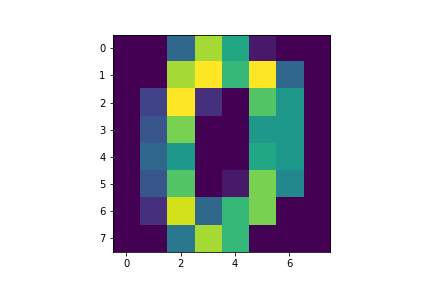

interactive(children=(IntSlider(value=0, description='x', max=1796), Output()), _dom_classes=('widget-interact',))

<function __main__.<lambda>>

In [1]:
import tensorflow as tf
import numpy as np

from sklearn.datasets import load_digits

digits = load_digits ()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import IntSlider
from IPython.display import display
from ipywidgets import interact

%matplotlib inline
%matplotlib notebook

rgb = (digits.data.reshape ([-1, 64,1]) + np.zeros ([1797,64,3])).reshape ([-1,8,8,3])/20.0
rgb = digits.data.reshape ([-1,8,8])
imgplot = plt.imshow(rgb [0])
interact (lambda x: imgplot.set_data (rgb[x]), x=IntSlider(min=0,max=rgb.shape[0]-1, value=0, step=1))

In [2]:
I = [i for i in range (digits.data.shape[0])]
np.random.shuffle (I)
train_size = 1000
I_train = I [:train_size]
I_test = I [train_size:]
targets_onehot = np.eye (10, dtype=np.float32)[digits.target]
digits_test = digits.data [I_test]
targets_test = targets_onehot [I_test]


In [5]:
tf.set_random_seed(0)

mask = np.array ([1 for i in range(64)])
mask [[i for i in range(64) if np.max (digits.data [:,i]) == 0]] = 0
mask = mask.reshape (len(mask),1) + np.zeros ([len(mask),10])

B = tf.Variable (tf.truncated_normal ([10], stddev=0.01, dtype=tf.float32))
W = tf.Variable (tf.truncated_normal ([64,10], stddev=0.01, dtype=tf.float32))# * tf.Variable (mask, dtype=tf.float32)

digits_in = tf.placeholder (tf.float32, shape=[None,64])
targets_in = tf.placeholder (tf.float32, shape=[None,10])

L = tf.matmul (digits_in, W) + B
S = tf.nn.softmax (tf.nn.sigmoid (L))

H = tf.reduce_mean (-tf.log (tf.reduce_sum (S * targets_in, axis=1)))
ACC = tf.reduce_mean (tf.cast (tf.equal (tf.argmax (S, axis=1), tf.argmax (targets_in, axis=1)), tf.float32))
train_step = tf.train.GradientDescentOptimizer (0.005).minimize (H)
init = tf.global_variables_initializer ()
sess = tf.Session ()
sess.run(init)

m = LinesMonitor ()
display (m.fig)

dic = {digits_in: digits_test, targets_in: targets_test}
a, = sess.run ([ACC], feed_dict=dic)
m.addPoint (1,a)

for i in range (2, 10001):
    batch = np.random.choice (I_train, 100)
    dic = {digits_in: digits.data [batch], targets_in: targets_onehot [batch]}
    sess.run (train_step, feed_dict=dic)
    dic = {digits_in: digits_test, targets_in: targets_test}
    a, = sess.run ([ACC], feed_dict=dic)
    #m.addPoint (i, a)
print (a)

Figure(axes=[Axis(scale=LinearScale(max=5.0, min=0.0)), Axis(orientation='vertical', scale=LinearScale(max=1.0, min=0.0))], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(max=5.0, min=0.0), 'y': LinearScale(max=1.0, min=0.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9})], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0))

0.951066
